# Módulo 2 - Optimização de Risco e Retornos

In [16]:
# Dados
using CSV              # Gravação/leitura de ficheiros em formato CSV
using DataFrames       # Tabelas
using Dates            # Datas

# Gráficos
using StatsPlots       # Gráficos 

# Estatistica
using Distributions    # Distribuições de probabilidade
using LsqFit           # REgressão linear e não-linear
using Statistics       # Estatística descritiva, inclui cálculo de quantis

# Optimização e Álgebra Linear
using Cbc              # Optimização com variáveis discretas
using Ipopt            # Optimização não-linear
using JuMP             # Linguagem de modelização para optimização
using Juniper          # Optimização não-linear com variáveis discretas
using LinearAlgebra    # Álgebra linear

Foi criada uma aplicação em Julia especialmente para a disciplina de Gestão de Riscos Financeiros chamada GRF.jl. Para a instalar podemos fazer, 

In [17]:
# import Pkg
# Pkg.add(url = "https://github.com/ASaragga/GRF.jl")
using GRF

Ler ficheiros com (i) retornos das açoes incluidas no índice Dow Jones, assim como (Ii) um conjunto suplementar de ações (e.g. Tesla)

In [18]:
DJ30r = CSV.read("/Users/antonio/Documents/Universidade/GRF-2022/Dados/DJ30r.csv", DataFrame);
DIVr = CSV.read("/Users/antonio/Documents/Universidade/GRF-2022/Dados/DIVr.csv", DataFrame);

In [19]:
Datas = DJ30r[!,:Data];
JPMorgan = DJ30r[!, :JPM];  # JP Morgan
PG = DJ30r[!, :PG];         # Procter & Gamble
Tesla = DIVr[!, :TSLA];     # Tesla

### Representação de Oportunidades de Investimento

O valor esperado é um operador linear: 
  \begin{equation}
  \mathbb{E}[\lambda X + (1-\lambda) Y] = \lambda \mathbb{E}[X] + (1-\lambda) \mathbb{E}[Y]
  \end{equation}


A volatilidade é um operador sub-linear
\begin{equation}
    \sigma[\lambda X + (1-\lambda) Y] \leq \lambda\, \sigma[X] + (1-\lambda)\, \sigma[Y]
    \end{equation}
    onde $\sigma[\cdot]$ denota a volatilidade dos retornos. Teremos uma relação de igualdade apenas se os retornos dos ativos X e Y estiverem perfeitamente correlacionados, $\rho(X,Y)=1$

Combinações de risco ($\sigma$) e retorno ($\mu$) para carteiras de dois ativos financeiros parametrizadas por diferentes niveis de correlação

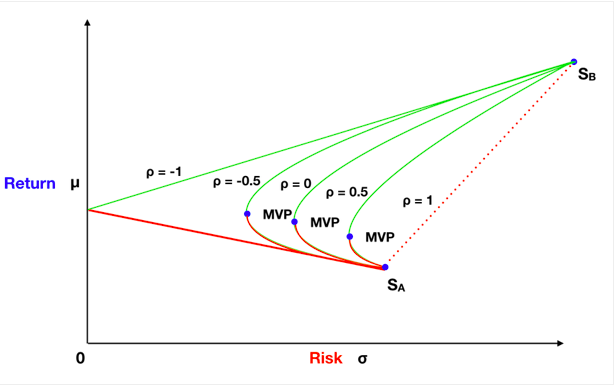

Para cada nível de correlação: (i) MVP localiza as carteiras de volatilidade/variância mínima, e (ii) as carteiras sobre a linha verde dominam as carteiras sobre a linha vermelha, pois para o mesmo risco têm superior retorno esperado.

### Optimização de Carteiras

In [20]:
carteira = [JPMorgan PG Tesla] ;  

Dados relativos aos valores esperados da ações JP Morgan, Procter & Gamble e Tesla

In [21]:
mu = [0.0002536565, 0.0000884940, 0.0004259978]   # vetor de retornos esperados

3-element Vector{Float64}:
 0.0002536565
 8.8494e-5
 0.0004259978

Podemos calcular a matriz de covariâncias ($\Sigma$)

In [22]:
Sigma = cov(carteira)               

3×3 Matrix{Float64}:
 0.000363208  8.96538e-5   0.000181118
 8.96538e-5   0.000157556  7.42504e-5
 0.000181118  7.42504e-5   0.00135939

#### Carteira de variância mínima

In [23]:
w_CVM = GRF.cvm(Sigma)

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        3
Number of nonzeros in inequality constraint Jacobian.:        3
Number of nonzeros in Lagrangian Hessian.............:        6

Total number of variables............................:        3
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        3
        inequality constraints with only lower bounds:        3
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 1.00e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

3-element Vector{Float64}:
 0.17943184424115394
 0.7825989220674956
 0.03796923369135047

A carteira de variância mínima é assim composta em 17.94\% por ações da JP Morgan, em 78.26\% por ações Procter \& Gamble e apenas em 3.80\% por ações da Tesla.

### Volatilidade e retorno esperado para a carteira de variância mínima.

In [24]:
r_CVM =  w_CVM' * mu
sigma_CVM = sqrt( w_CVM' * Sigma * w_CVM)
println("Volatilidade(CVM) = ", sigma_CVM, ", Retorno esperado(CVM) = ", r_CVM )

Volatilidade(CVM) = 0.011925174377339719, Retorno esperado(CVM) = 0.0001309441726283984


### Fronteira eficiente

A fronteira eficiente e a carteira de variância mínima são apresentados na Figura seguinte, obtidas através da função,

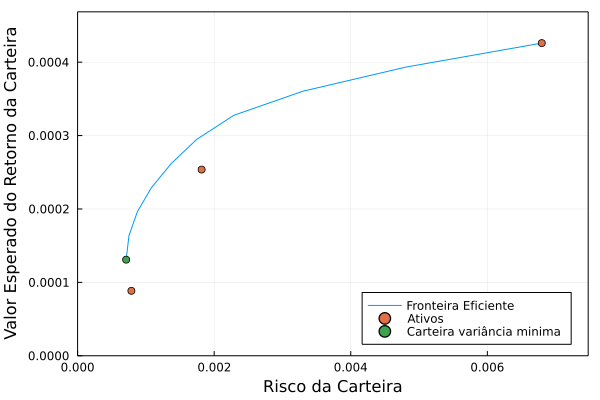

In [25]:
GRF.gfe(mu, Sigma, 5)

Podemos observar que as ações da JP Morgan e da Procter \& Gamble não estão sobre a fronteira eficiente, havendo composições da carteira que para o mesmo VaR dessas ações geram um retorno esperado superior. 

Na Figura seguinte é apresentada a alocação de dez carteiras idênticamente espaçadas em termos de retorno esperado ao longo da fronteira eficiente, obtida através da função,

In [26]:
GRF.alocar(mu, Sigma, [:JPMorgan, :PG, :Tesla]);

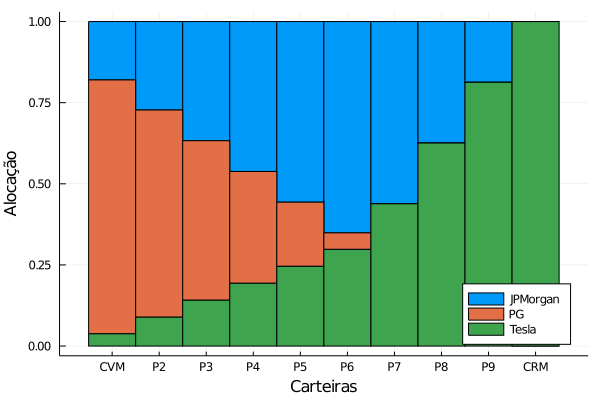

CVM denota a carteira de variância mínima e CRM denota a carteira de retorno máximo. Nas carteiras de menor risco (CVM-P3) a Procter \& Gamble tem um peso dominante na carteira. Nas carteiras de risco médio (P4-P7) a JP Morgam tem um maior peso. Finalmente, nas carteiras de maior risco (P8-CRM) a Tesla tem maior peso, constituindo a totalidade da carteira quando o retorno esperado é máximo.  